<a href="https://colab.research.google.com/github/umais2005/DeepLearning/blob/main/Training_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

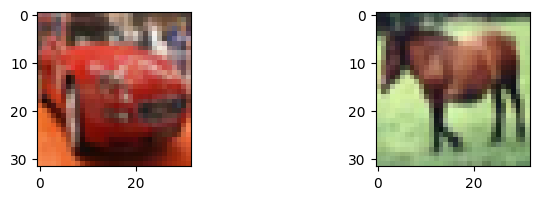

In [26]:
plt.figure(figsize=(8,2))
plt.subplot(121)
plt.imshow(X_train[5])
plt.subplot(122)
plt.imshow(X_train[7])

In [35]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

10 classes, balanced

In [56]:
def build_model(n_hidden=20, n_units=100,activation='relu', init='glorot_uniform'):
  tf.keras.backend.clear_session()
  tf.random.set_seed(42)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(32,32,3)))
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_units, activation=activation,
                                    kernel_initializer=init))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  return model

def build_and_compile_model(optimizer=tf.keras.optimizers.Adam, lr=0.001, **kwargs):
  model = build_model(**kwargs)
  model.compile(optimizer=optimizer(learning_rate=lr), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model


In [57]:
model = build_and_compile_model(activation='swish', init='he_uniform', optimizer=tf.keras.optimizers.Nadam)


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [61]:
early_stopper= tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard()